In [44]:
#  Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer

In [45]:
df = pd.read_csv('../csv/loan.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\biraj\AppData\Local\Temp\ipykernel_14328\2933120964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


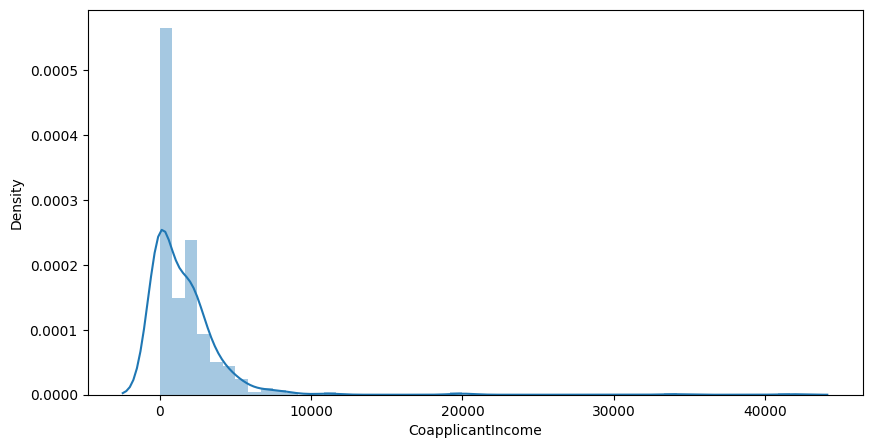

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(df['CoapplicantIncome'])
plt.show()

### Removing outliers

In [49]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)

Q1, Q3

(0.0, 2297.25)

In [50]:
IQR = Q3-Q1
IQR

2297.25

In [51]:
min_range = Q1-(1.5*IQR)
max_range = Q3+(1.5*IQR)

min_range, max_range

(-3445.875, 5743.125)

In [52]:
df = df[df['CoapplicantIncome'] <= max_range]

C:\Users\biraj\AppData\Local\Temp\ipykernel_14328\2933120964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


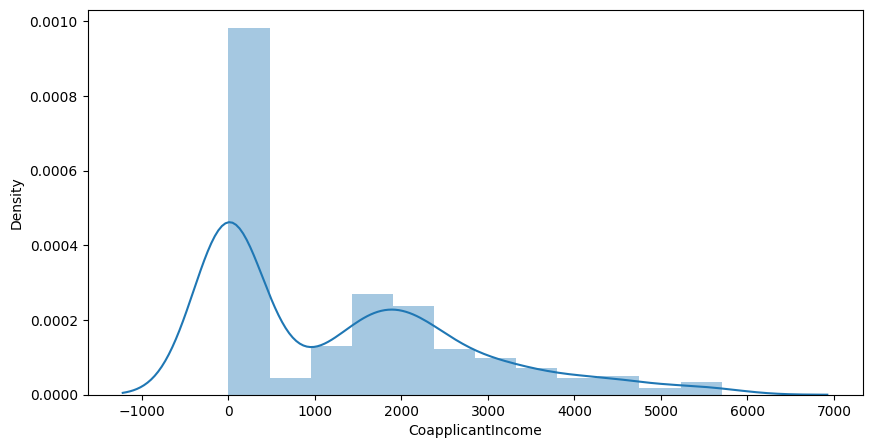

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(df['CoapplicantIncome'])
plt.show()

###  Converting to normal Distribution (Using Function Transformation)

In [57]:
ft = FunctionTransformer(func = np.log1p)  #Get ready for log function 

In [58]:
ft.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [60]:
df['transformed_CoapplicantIncome'] = ft.fit_transform(df[['CoapplicantIncome']])

C:\Users\biraj\AppData\Local\Temp\ipykernel_14328\4018009008.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\biraj\AppData\Local\Temp\ipykernel_14328\4018009008.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['transformed_CoapplicantIncome'])


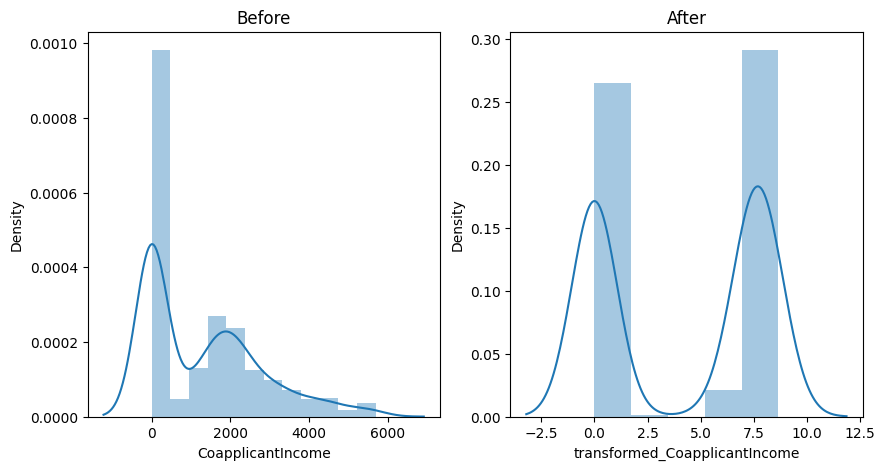

In [61]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
sns.distplot(df['CoapplicantIncome'])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(df['transformed_CoapplicantIncome'])
plt.title("After")
plt.show()

### Using x(square) for function transform

In [66]:
ft1 = FunctionTransformer(func = lambda x: x**2) 
ft1.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<function <lambda> at 0x000001EACDFF2E80>)

In [70]:
df['transformed_using_x2_CoapplicantIncome'] = ft1.fit_transform(df[['CoapplicantIncome']])


C:\Users\biraj\AppData\Local\Temp\ipykernel_14328\138290687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\biraj\AppData\Local\Temp\ipykernel_14328\138290687.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['transformed_using_x2_CoapplicantIncome'])


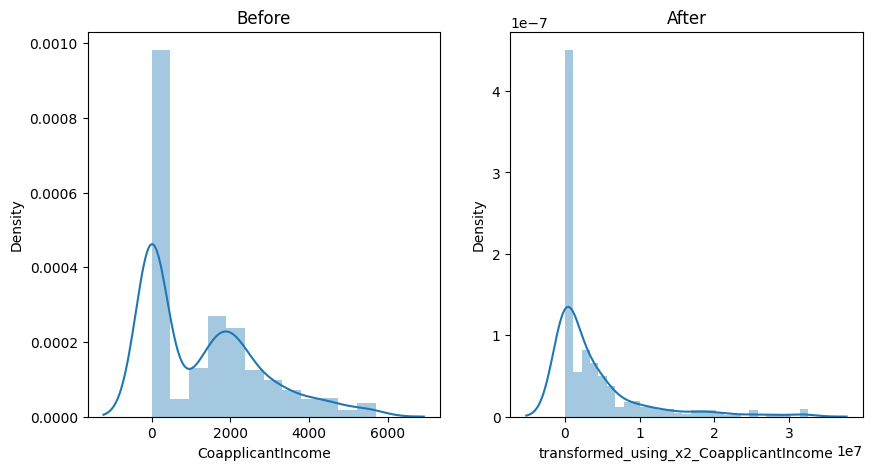

In [71]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
sns.distplot(df['CoapplicantIncome'])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(df['transformed_using_x2_CoapplicantIncome'])
plt.title("After")
plt.show()